In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter("ignore")


In [ ]:
data= pd.read_csv("/content/Traffic_Violations.csv")
data

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,971ef50f-f138-419f-89e5-5d2cc5d7b75a,04/30/2023,23:55:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,KEMP MILL ROAD @ ALPERT LANE,39.053038,-77.024637,No,...,13-401(h),Transportation Article,False,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0530383333333, -77.0246366666667)"
1,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,21-901.1(b),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
2,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,21-901.1(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
3,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,21-301(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
4,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,21-902(a1i),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17147,1dfa02a8-6f06-4abd-9453-079a270ad154,08/03/2023,09:43:00,MCP,"2nd District, Bethesda",MOTORCYCLE OPERATOR OVERTAKING AND PASSING VEH...,NICHOLSON LN/HUFF CT,39.045017,-77.111267,No,...,21-1303(c),Transportation Article,False,OTHER,M,HYATTSVILLE,MD,MD,B - Unmarked Patrol,"(39.0450166666667, -77.1112666666667)"
17148,714e08e1-3baf-4195-8b4b-3b2028229c0c,08/03/2023,06:36:00,MCP,Headquarters and Special Operations,OPERATING VEHICLE ON HIGHWAY WITH UNAUTHORIZED...,FREDERICK RD @ CLARKSBURG RD,39.235407,-77.274977,No,...,22-406(i1),Transportation Article,False,WHITE,M,FREDERICK,MD,MD,A - Marked Patrol,"(39.2354066666667, -77.2749766666667)"
17149,e63d0c8a-c72d-40ff-b060-92b76b3e3b3e,08/03/2023,05:41:00,MCP,Headquarters and Special Operations,EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,NB RT118 @ DAWSON FARM RD,39.172867,-77.275377,No,...,21-801.1,Transportation Article,False,OTHER,M,GERMANTOWN,MD,MD,Q - Marked Laser,"(39.1728666666667, -77.2753766666667)"
17150,8911243c-4bb7-42e1-8e6d-d09db2cff6a8,08/02/2023,23:36:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,N. FREDERICK @ CHRISTOPHER,39.153003,-77.212912,No,...,21-202(h1),Transportation Article,False,WHITE,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1530033333333, -77.2129116666667)"


In [ ]:
data.head(15)

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,971ef50f-f138-419f-89e5-5d2cc5d7b75a,04/30/2023,23:55:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,KEMP MILL ROAD @ ALPERT LANE,39.053038,-77.024637,No,...,13-401(h),Transportation Article,False,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0530383333333, -77.0246366666667)"
1,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,21-901.1(b),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
2,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,21-901.1(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
3,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,21-301(a),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
4,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,21-902(a1i),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
5,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",DRIVING OFF ROADWAY WHILE PASSING VEHICLE,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,21-304(c),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
6,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,21-902(a1ii),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
7,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,MCP,"2nd District, Bethesda",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,JONES MILL ROAD/ LE VELLE DRIVE,38.991480,-77.097113,No,...,13-401(h),Transportation Article,False,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.99148, -77.0971133333333)"
8,0eadad00-ab24-4722-b195-4c9f91f20891,04/30/2023,10:43:00,MCP,"3rd District, Silver Spring",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,650 AT LOCKWOOD DR,0.000000,0.000000,No,...,16-303(c),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
9,0eadad00-ab24-4722-b195-4c9f91f20891,04/30/2023,10:43:00,MCP,"3rd District, Silver Spring",DISPLAYING REG. PLATE ISSUED FOR OTHER VEHICLE,650 AT LOCKWOOD DR,0.000000,0.000000,No,...,13-411(g),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [ ]:
data.sample(2)

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
495,7d6d0f94-8eeb-4e3e-9183-a5ee8424944f,05/03/2023,07:56:00,MCP,Headquarters and Special Operations,EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,NB RT.27 @ APPLE ORCHARD WAY,39.226467,-77.236723,No,...,21-801.1,Transportation Article,False,WHITE,M,GERMANTOWN,MD,MD,Q - Marked Laser,"(39.2264666666667, -77.2367233333333)"
2888,95cd88ed-90af-4e37-ba9e-27fc195e65d9,05/15/2023,07:49:00,MCP,"3rd District, Silver Spring",DRIVER CHANGING LANES WHEN UNSAFE,PINEY BRANCH / UNIVERSITY BLVD E,38.999715,-76.994472,No,...,21-309(b),Transportation Article,False,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.999715, -76.9944716666667)"


In [ ]:
# information About Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17152 entries, 0 to 17151
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeqID                    17152 non-null  object 
 1   Date Of Stop             17152 non-null  object 
 2   Time Of Stop             17152 non-null  object 
 3   Agency                   17152 non-null  object 
 4   SubAgency                17152 non-null  object 
 5   Description              17152 non-null  object 
 6   Location                 17152 non-null  object 
 7   Latitude                 17151 non-null  float64
 8   Longitude                17151 non-null  float64
 9   Accident                 17151 non-null  object 
 10  Belts                    17151 non-null  object 
 11  Personal Injury          17151 non-null  object 
 12  Property Damage          17151 non-null  object 
 13  Fatal                    17151 non-null  object 
 14  Commercial License    

In [ ]:
# this function to know how many columns and raws and data
data.shape

(17152, 43)

In [ ]:
# function to calculate summary statistics
data['Gender'].describe()

count     17151
unique        3
top           M
freq      11763
Name: Gender, dtype: object

In [ ]:
# exploring name of columns
def check_columns():
   return data.columns
check_columns()

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')

In [ ]:
data.dtypes

SeqID                       object
Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Latitude                   float64
Longitude                  float64
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
Search Conducted            object
Search Disposition          object
Search Outcome              object
Search Reason               object
Search Reason For Stop      object
Search Type                 object
Search Arrest Reason        object
State                       object
VehicleType                 object
Year                

In [ ]:
# i will drop column [country_name] because not contain values
data.drop('Color',inplace=True,axis=1)

In [ ]:
check_columns()

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Violation Type', 'Charge', 'Article', 'Contributed To Accident',
       'Race', 'Gender', 'Driver City', 'Driver State', 'DL State',
       'Arrest Type', 'Geolocation'],
      dtype='object')

In [ ]:
# i will drop columns i will not use them at my project
data.drop(['Geolocation','Personal Injury','Race','Make', 'Model', 'Commercial License'],inplace=True,axis=1)

In [ ]:
# i will drop columns i will not use them at my project
data.drop(['Location','Latitude', 'Longitude','Agency','SubAgency'],inplace=True,axis=1)

In [ ]:
# i will drop columns i will not use them at my project
data.drop(['Fatal','HAZMAT', 'Commercial Vehicle','Work Zone','Search Conducted'],inplace=True,axis=1)

In [ ]:
check_columns()

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Description', 'Accident',
       'Belts', 'Property Damage', 'Alcohol', 'Search Disposition',
       'Search Outcome', 'Search Reason', 'Search Reason For Stop',
       'Search Type', 'Search Arrest Reason', 'State', 'VehicleType', 'Year',
       'Violation Type', 'Charge', 'Article', 'Contributed To Accident',
       'Gender', 'Driver City', 'Driver State', 'DL State', 'Arrest Type'],
      dtype='object')

In [ ]:
# test Data After Modify
data.head(4)

,SeqID,Date Of Stop,Time Of Stop,Description,Accident,Belts,Property Damage,Alcohol,Search Disposition,Search Outcome,...,Year,Violation Type,Charge,Article,Contributed To Accident,Gender,Driver City,Driver State,DL State,Arrest Type
0,971ef50f-f138-419f-89e5-5d2cc5d7b75a,04/30/2023,23:55:00,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,No,No,No,No,NaN,Citation,...,2013.0,Citation,13-401(h),Transportation Article,False,F,SILVER SPRING,MD,MD,A - Marked Patrol
1,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,No,No,No,No,NaN,Citation,...,2019.0,Citation,21-901.1(b),Transportation Article,False,F,SILVER SPRING,MD,MD,A - Marked Patrol
2,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,No,No,No,No,NaN,Citation,...,2019.0,Citation,21-901.1(a),Transportation Article,False,F,SILVER SPRING,MD,MD,A - Marked Patrol
3,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,No,No,No,No,NaN,Citation,...,2019.0,Citation,21-301(a),Transportation Article,False,F,SILVER SPRING,MD,MD,A - Marked Patrol


In [ ]:
# rename column to another good name
data.rename(columns={"Search Outcome":'Result_of_violation'},inplace=True)
data.head(2)

,SeqID,Date Of Stop,Time Of Stop,Description,Accident,Belts,Property Damage,Alcohol,Search Disposition,Result_of_violation,...,Year,Violation Type,Charge,Article,Contributed To Accident,Gender,Driver City,Driver State,DL State,Arrest Type
0,971ef50f-f138-419f-89e5-5d2cc5d7b75a,04/30/2023,23:55:00,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,No,No,No,No,NaN,Citation,...,2013.0,Citation,13-401(h),Transportation Article,False,F,SILVER SPRING,MD,MD,A - Marked Patrol
1,1b3ad74c-9e3b-47af-acba-cc3fcb656e6f,04/30/2023,04:24:00,NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,No,No,No,No,NaN,Citation,...,2019.0,Citation,21-901.1(b),Transportation Article,False,F,SILVER SPRING,MD,MD,A - Marked Patrol


In [ ]:
check_columns()

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Description', 'Accident',
       'Belts', 'Property Damage', 'Alcohol', 'Search Disposition',
       'Result_of_violation', 'Search Reason', 'Search Reason For Stop',
       'Search Type', 'Search Arrest Reason', 'State', 'VehicleType', 'Year',
       'Violation Type', 'Charge', 'Article', 'Contributed To Accident',
       'Gender', 'Driver City', 'Driver State', 'DL State', 'Arrest Type'],
      dtype='object')

In [ ]:
data.isnull().sum()

SeqID                          0
Date Of Stop                   0
Time Of Stop                   0
Description                    0
Accident                       1
Belts                          1
Property Damage                1
Alcohol                        1
Search Disposition         16400
Result_of_violation         6489
Search Reason              16400
Search Reason For Stop      6482
Search Type                16400
Search Arrest Reason       16622
State                          1
VehicleType                    1
Year                          36
Violation Type                 1
Charge                         1
Article                      523
Contributed To Accident        1
Gender                         1
Driver City                    2
Driver State                   1
DL State                       4
Arrest Type                    1
dtype: int64

In [ ]:
# explore Data
data.sample(5)

,SeqID,Date Of Stop,Time Of Stop,Description,Accident,Belts,Property Damage,Alcohol,Search Disposition,Result_of_violation,...,Year,Violation Type,Charge,Article,Contributed To Accident,Gender,Driver City,Driver State,DL State,Arrest Type
14638,7a71679f-3b2c-46be-b2a9-df221baa5691,07/13/2023,19:53:00,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,No,No,No,No,NaN,Citation,...,2021.0,Warning,21-201(a1),Transportation Article,False,F,SILVER SPRING,MD,MD,A - Marked Patrol
1593,ac60f90b-357f-4ef1-8e0b-787351861dbe,05/07/2023,22:37:00,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,No,No,No,No,NaN,Warning,...,2017.0,Warning,13-409(b),Transportation Article,False,M,SILVER SPRING,MD,MD,A - Marked Patrol
3551,a2813f40-8589-4843-9c60-589e6ac4603a,05/20/2023,08:29:00,FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID...,Yes,Yes,Yes,No,NaN,Citation,...,2002.0,Citation,21-801(b),Transportation Article,True,M,ROCKVILLE,MD,MD,A - Marked Patrol
10071,646fe41d-fc79-432c-919f-cac1d8067ec2,06/19/2023,14:05:00,DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,No,No,No,No,NaN,NaN,...,2011.0,Citation,16-101(a1),Transportation Article,False,M,MONTGOMERY VILLAGE,MD,XX,Q - Marked Laser
5345,93857ab2-f06c-4161-8655-cab2db4b3194,05/27/2023,19:32:00,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,No,No,No,No,NaN,Warning,...,1999.0,Warning,21-201(a1),Transportation Article,False,M,GAITHERSBURG,MD,MD,A - Marked Patrol


In [ ]:
# to know presentage violation
violation=data["Description"].value_counts()
violation

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                          1647
EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH                                                           885
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                            806
EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH                                                           769
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND            509
                                                                                                    ... 
DISPLAYING REG. PLATES ISSUED TO OTHER PERSON                                                          1
DRIVING WHILE LIC. SUSP. UNDER 16-203, 16-206A2 FAIL TO ATTEND DIP, 17-106, 26-204/206 OR 27-103       1
EXCEEDING POSTED MAXIMUM SPEED LIMIT: 87 MPH IN A POSTED 60 MPH ZONE                                   1
PERSON DRIVING, MOVING ON HWY. VEH.,  WITH VISIBLE RED,

# **Question 2: Which type of person has the most violations == male or female ?**

In [ ]:
#check Unique Values
data['Gender'].unique()

array(['F', 'M', 'U', nan], dtype=object)

In [ ]:
data['Gender'].value_counts()

M    11763
F     5355
U       33
Name: Gender, dtype: int64

In [ ]:
data.drop(data[data['Gender'] == 'U'].index, inplace=True)

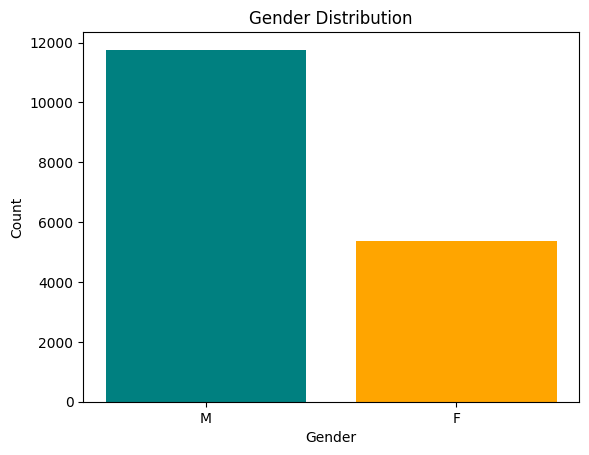

In [ ]:
# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()
gender_counts
# Create a bar plot
plt.bar(gender_counts.index, gender_counts.values,color=['teal', 'orange'], label=['Male','female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

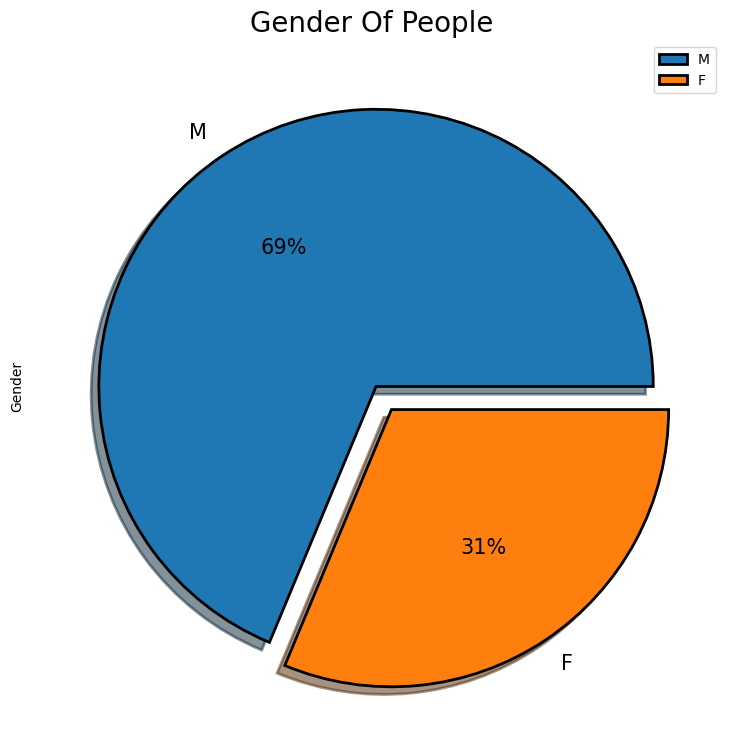

In [ ]:
Gender=data["Gender"].value_counts()
Gender
#explode = (0, 0.1)
fig = plt.figure(figsize =(15, 9))
Gender.plot(kind='pie',textprops={'fontsize': 15},
wedgeprops = {"edgecolor" : "black",
               'linewidth': 2,
               'antialiased': True  }, autopct='%1.0f%%',explode=(0,0.1),shadow=True)
plt.title('Gender Of People ' ,size=20)
plt.legend(['M',"F"])

In [ ]:
#check Unique Values
data['Accident'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Accident'].value_counts()

No     16482
Yes      636
Name: Accident, dtype: int64

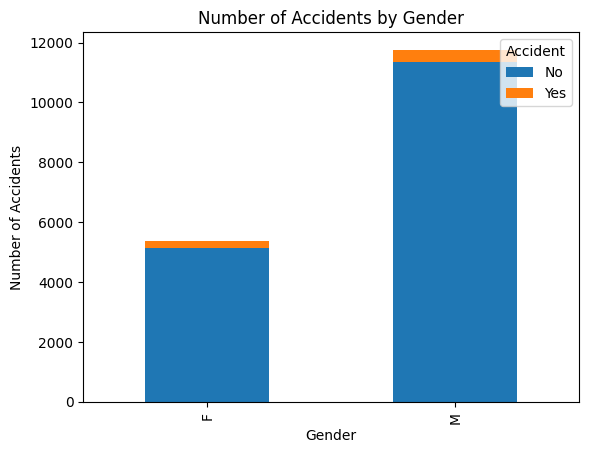

In [ ]:
# Group the data by 'Gender' and count the number of 'Yes' in 'Accident' column
gender_accident_counts = data.groupby('Gender')['Accident'].value_counts().unstack().fillna(0)

# Plot the data
gender_accident_counts.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Gender')
plt.legend(title='Accident', loc='upper right', labels=['No', 'Yes'])

plt.show()

**Conclusion:**
After examining the data, we found that the ratio of males to females is greater in cases of violation, Where males occupied 69% compared to females who occupied 31%

In [ ]:
# to know presentage violation
violation=data["Description"].value_counts()
violation

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                          1645
EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH                                                           884
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                            805
EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH                                                           769
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND            509
                                                                                                    ... 
DISPLAYING REG. PLATES ISSUED TO OTHER PERSON                                                          1
DRIVING WHILE LIC. SUSP. UNDER 16-203, 16-206A2 FAIL TO ATTEND DIP, 17-106, 26-204/206 OR 27-103       1
EXCEEDING POSTED MAXIMUM SPEED LIMIT: 87 MPH IN A POSTED 60 MPH ZONE                                   1
PERSON DRIVING, MOVING ON HWY. VEH.,  WITH VISIBLE RED,

# **If yes then why if no then why prove it through your dataset**



*   DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE = 1645
*   EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH = 884